In [1]:
# 1. 导入必要的库
import numpy as np
import matplotlib.pyplot as plt
from sklearn import svm
from sklearn.datasets import make_circles, make_moons, make_classification
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler

# 设置随机种子保证结果可重现
np.random.seed(42)

In [2]:
# 2. 创建三种不同的数据集来展示核函数效果
# 线性可分数据
X_linear, y_linear = make_classification(n_samples=100, n_features=2, 
                                        n_redundant=0, n_informative=2,
                                        random_state=1, n_clusters_per_class=1)

# 圆形数据（线性不可分）
X_circle, y_circle = make_circles(n_samples=100, factor=0.5, noise=0.1, random_state=42)

# 月亮形数据（非线性可分）
X_moon, y_moon = make_moons(n_samples=100, noise=0.1, random_state=42)

# 3. 数据预处理：标准化
scaler = StandardScaler()
X_linear = scaler.fit_transform(X_linear)
X_circle = scaler.fit_transform(X_circle)
X_moon = scaler.fit_transform(X_moon)

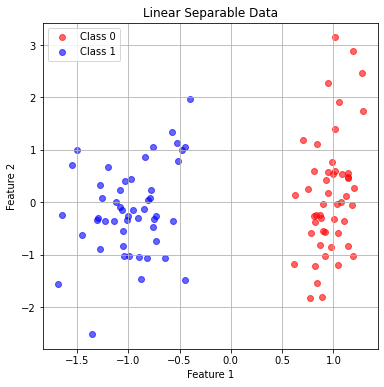

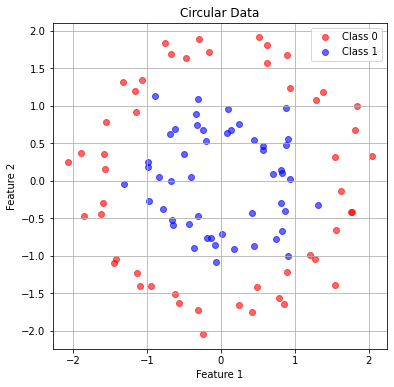

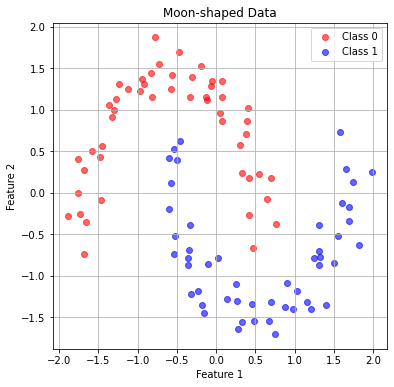

In [3]:
# 4. 可视化原始数据
def plot_dataset(X, y, title):
    """可视化数据集"""
    plt.figure(figsize=(6, 6))
    plt.scatter(X[y == 0, 0], X[y == 0, 1], color='red', label='Class 0', alpha=0.6)
    plt.scatter(X[y == 1, 0], X[y == 1, 1], color='blue', label='Class 1', alpha=0.6)
    plt.title(title)
    plt.xlabel('Feature 1')
    plt.ylabel('Feature 2')
    plt.legend()
    plt.grid(True)
    plt.show()

plot_dataset(X_linear, y_linear, "Linear Separable Data")
plot_dataset(X_circle, y_circle, "Circular Data")
plot_dataset(X_moon, y_moon, "Moon-shaped Data")

In [4]:
# 5. 定义SVM训练和可视化函数
def train_and_plot_svm(X, y, kernel_type, C=1.0, gamma='scale'):
    """
    训练SVM并可视化决策边界
    
    参数:
    X -- 特征数据
    y -- 标签数据
    kernel_type -- 核函数类型 ('linear', 'poly', 'rbf', 'sigmoid')
    C -- 正则化参数
    gamma -- 'rbf', 'poly' 和 'sigmoid' 的核系数
    """
    
    # 创建SVM分类器
    clf = svm.SVC(kernel=kernel_type, C=C, gamma=gamma)
    
    # 训练模型
    clf.fit(X, y)
    
    # 计算准确率
    y_pred = clf.predict(X)
    acc = accuracy_score(y, y_pred)
    
    # 创建网格用于绘制决策边界
    x_min, x_max = X[:, 0].min() - 0.5, X[:, 0].max() + 0.5
    y_min, y_max = X[:, 1].min() - 0.5, X[:, 1].max() + 0.5
    xx, yy = np.meshgrid(np.linspace(x_min, x_max, 100),
                         np.linspace(y_min, y_max, 100))
    
    # 预测网格点的类别
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    
    # 绘制决策边界和数据点
    plt.figure(figsize=(8, 6))
    plt.contourf(xx, yy, Z, alpha=0.3, cmap=plt.cm.coolwarm)
    plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.coolwarm, edgecolors='k')
    
    # 标记支持向量
    sv = clf.support_vectors_
    plt.scatter(sv[:, 0], sv[:, 1], facecolors='none', 
                edgecolors='yellow', s=100, linewidths=1.5, 
                label='Support Vectors')
    
    plt.title(f"SVM with {kernel_type} kernel\nAccuracy: {acc:.2f}")
    plt.xlabel('Feature 1')
    plt.ylabel('Feature 2')
    plt.legend()
    plt.grid(True)
    plt.show()
    
    return clf


=== 线性可分数据 ===


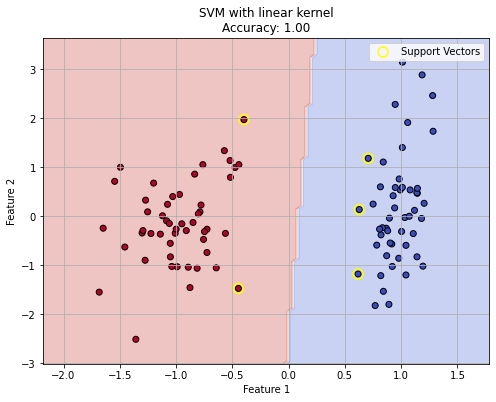


=== 圆形数据 ===
线性核:


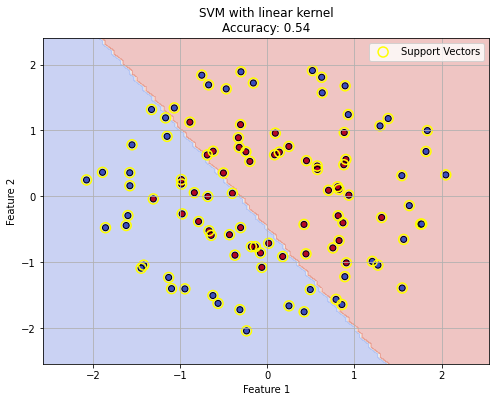

RBF核:


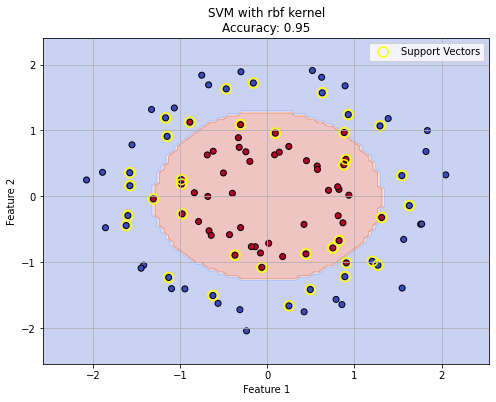


=== 月亮形数据 ===
线性核:


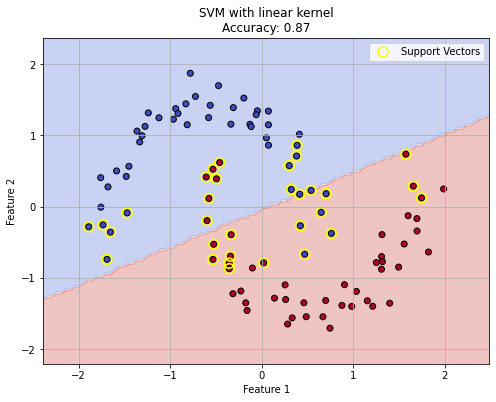

RBF核:


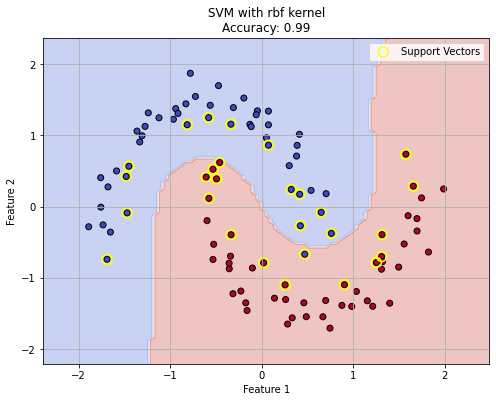

Sigmoid核:


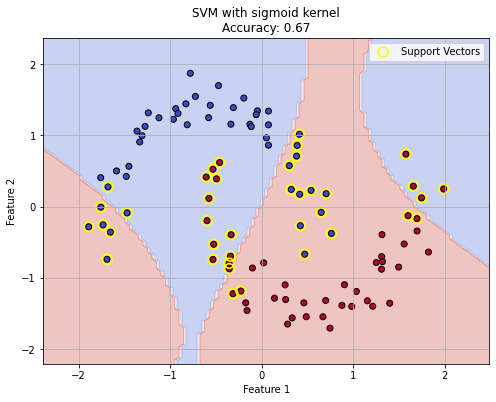

SVC(gamma=0.7, kernel='sigmoid')

In [6]:
# 6. 在不同数据集上测试不同核函数

# 6.1 线性可分数据
print("\n=== 线性可分数据 ===")
linear_clf = train_and_plot_svm(X_linear, y_linear, 'linear', C=1.0)

# 6.2 圆形数据
print("\n=== 圆形数据 ===")
print("线性核:")
train_and_plot_svm(X_circle, y_circle, 'linear', C=1.0)
print("RBF核:")
train_and_plot_svm(X_circle, y_circle, 'rbf', C=1.0, gamma=0.7)


# 6.3 月亮形数据
print("\n=== 月亮形数据 ===")
print("线性核:")
train_and_plot_svm(X_moon, y_moon, 'linear', C=1.0)
print("RBF核:")
train_and_plot_svm(X_moon, y_moon, 'rbf', C=1.0, gamma=0.7)
print("Sigmoid核:")
train_and_plot_svm(X_moon, y_moon, 'sigmoid', C=1.0, gamma=0.7)

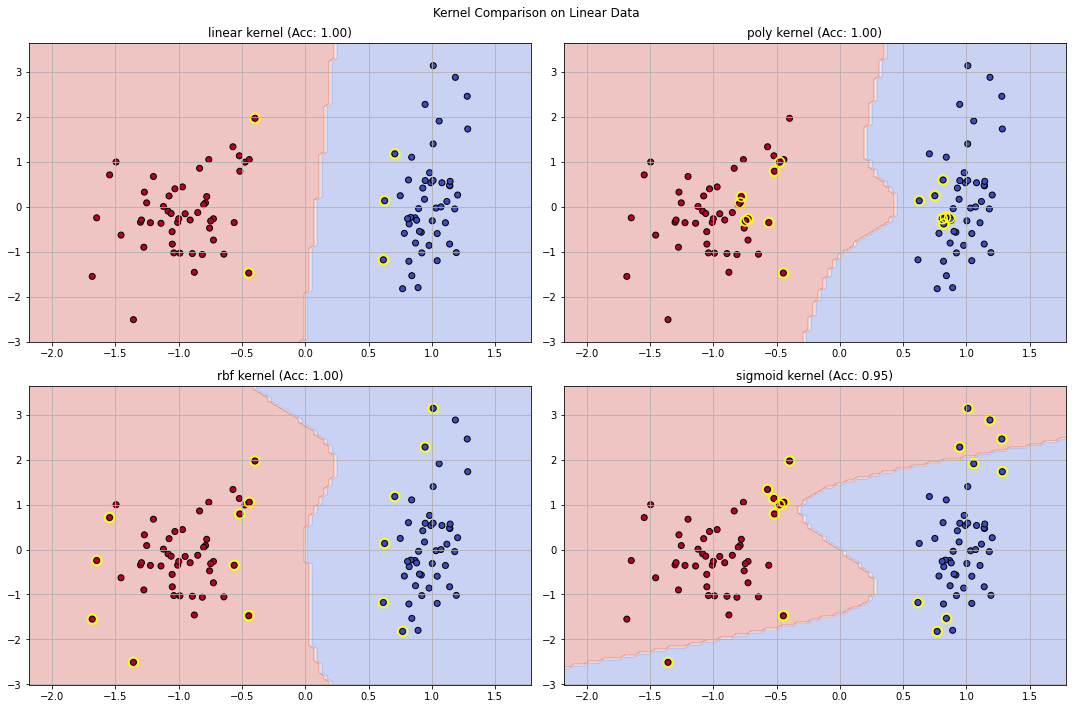

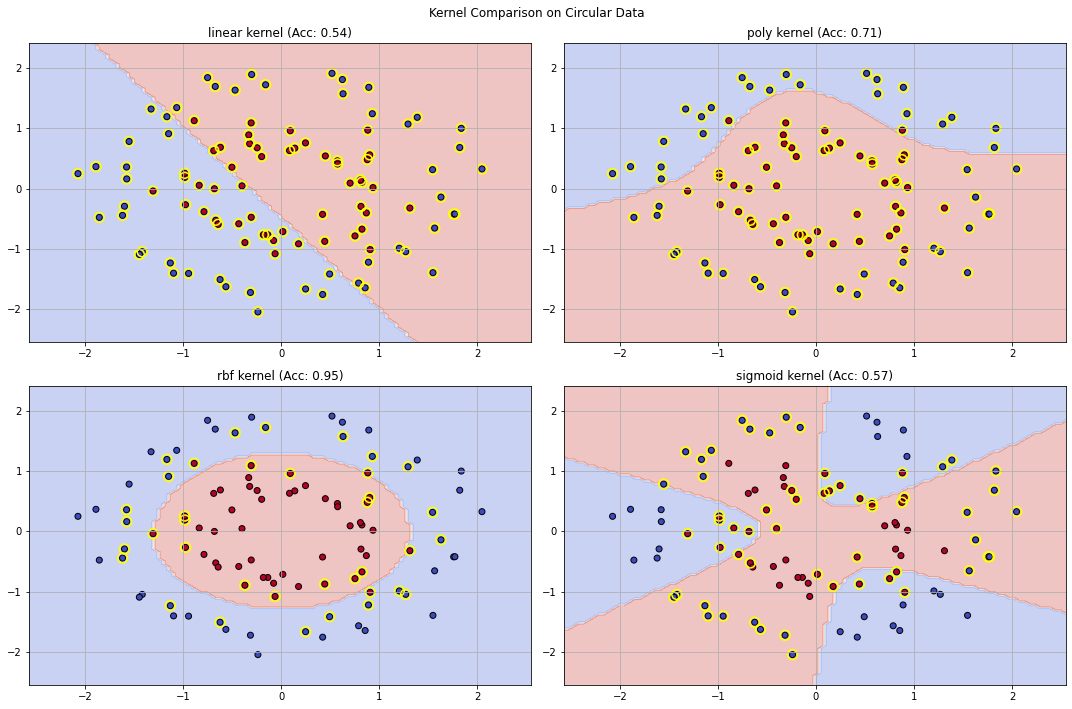

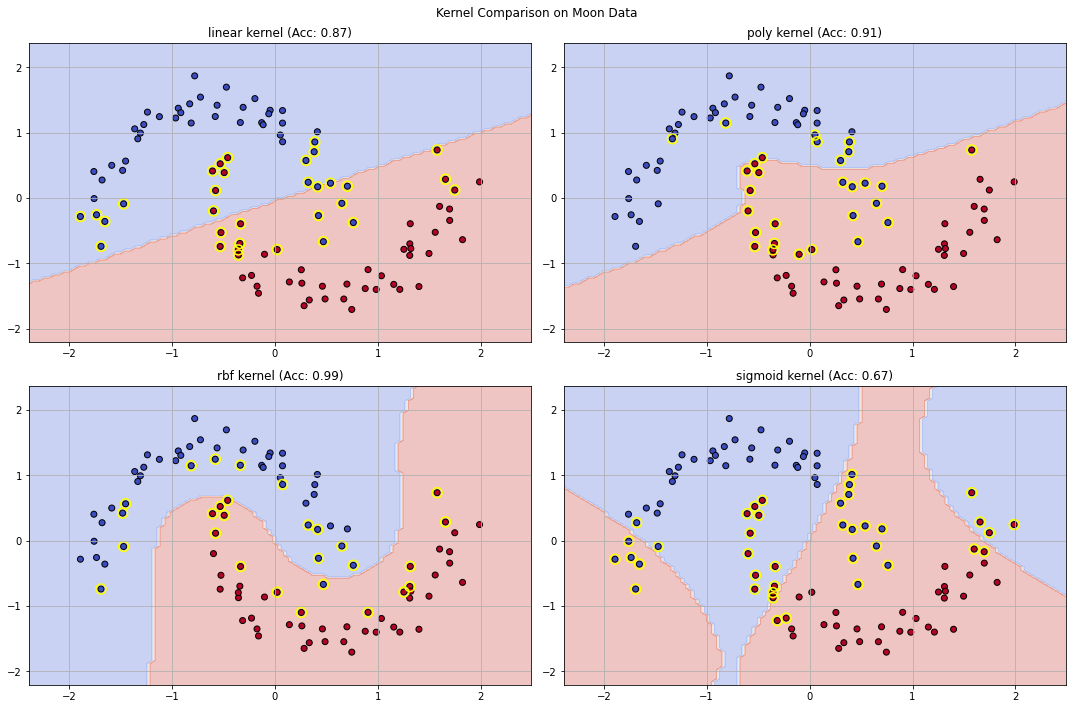

In [7]:
# 7. 核函数比较实验
def compare_kernels(X, y, title):
    """比较不同核函数在同一数据集上的表现"""
    kernels = ['linear', 'poly', 'rbf', 'sigmoid']
    
    plt.figure(figsize=(15, 10))
    for i, kernel in enumerate(kernels):
        plt.subplot(2, 2, i+1)
        
        # 创建并训练SVM
        clf = svm.SVC(kernel=kernel, gamma=0.7, C=1.0)
        clf.fit(X, y)
        
        # 创建网格
        x_min, x_max = X[:, 0].min() - 0.5, X[:, 0].max() + 0.5
        y_min, y_max = X[:, 1].min() - 0.5, X[:, 1].max() + 0.5
        xx, yy = np.meshgrid(np.linspace(x_min, x_max, 100),
                             np.linspace(y_min, y_max, 100))
        
        # 预测并绘制
        Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
        Z = Z.reshape(xx.shape)
        plt.contourf(xx, yy, Z, alpha=0.3, cmap=plt.cm.coolwarm)
        plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.coolwarm, edgecolors='k')
        
        # 标记支持向量
        sv = clf.support_vectors_
        plt.scatter(sv[:, 0], sv[:, 1], facecolors='none', 
                    edgecolors='yellow', s=100, linewidths=1.5)
        
        plt.title(f"{kernel} kernel (Acc: {accuracy_score(y, clf.predict(X)):.2f})")
        plt.grid(True)
    
    plt.suptitle(title)
    plt.tight_layout()
    plt.show()

# 在不同数据集上比较核函数
compare_kernels(X_linear, y_linear, "Kernel Comparison on Linear Data")
compare_kernels(X_circle, y_circle, "Kernel Comparison on Circular Data")
compare_kernels(X_moon, y_moon, "Kernel Comparison on Moon Data")

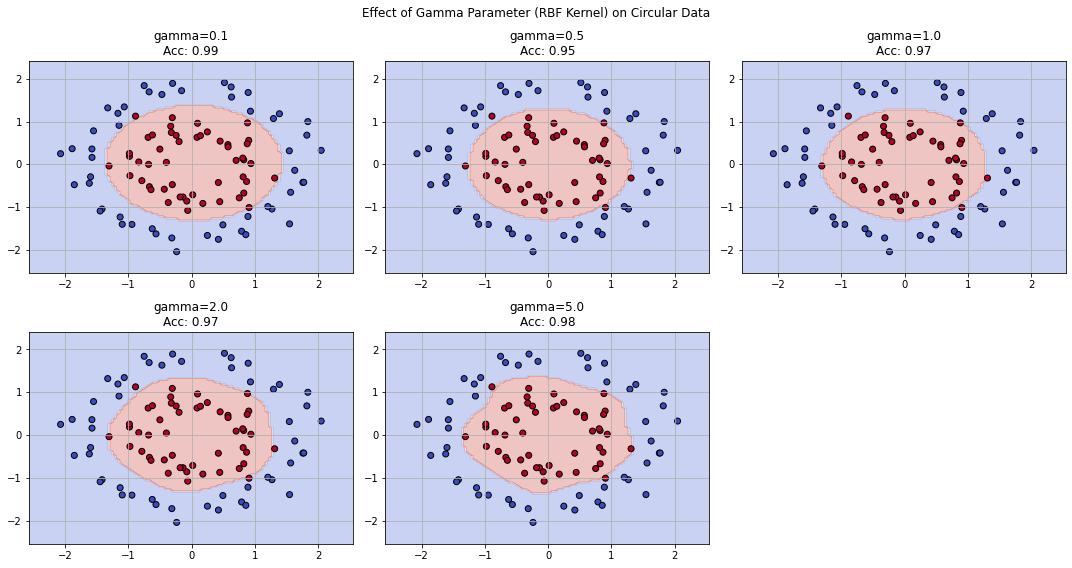

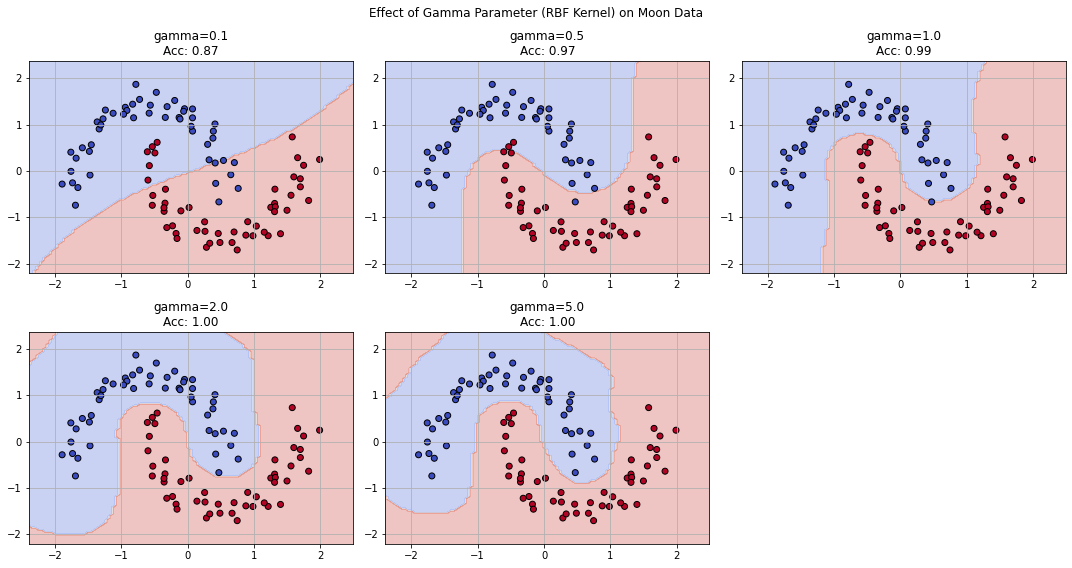

In [8]:
# 8. 参数调优实验 - 以RBF核为例
def gamma_experiment(X, y, title):
    """展示不同gamma值对RBF核的影响"""
    gamma_values = [0.1, 0.5, 1.0, 2.0, 5.0]
    
    plt.figure(figsize=(15, 8))
    for i, gamma in enumerate(gamma_values):
        plt.subplot(2, 3, i+1)
        
        clf = svm.SVC(kernel='rbf', gamma=gamma, C=1.0)
        clf.fit(X, y)
        
        # 创建网格
        x_min, x_max = X[:, 0].min() - 0.5, X[:, 0].max() + 0.5
        y_min, y_max = X[:, 1].min() - 0.5, X[:, 1].max() + 0.5
        xx, yy = np.meshgrid(np.linspace(x_min, x_max, 100),
                             np.linspace(y_min, y_max, 100))
        
        # 预测并绘制
        Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
        Z = Z.reshape(xx.shape)
        plt.contourf(xx, yy, Z, alpha=0.3, cmap=plt.cm.coolwarm)
        plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.coolwarm, edgecolors='k')
        
        plt.title(f"gamma={gamma}\nAcc: {accuracy_score(y, clf.predict(X)):.2f}")
        plt.grid(True)
    
    plt.suptitle(title)
    plt.tight_layout()
    plt.show()

gamma_experiment(X_circle, y_circle, "Effect of Gamma Parameter (RBF Kernel) on Circular Data")
gamma_experiment(X_moon, y_moon, "Effect of Gamma Parameter (RBF Kernel) on Moon Data")

In [9]:
# 9. 支持向量可视化
def plot_support_vectors(clf, X, y, title):
    """可视化支持向量"""
    plt.figure(figsize=(8, 6))
    
    # 获取支持向量的索引
    sv_indices = clf.support_
    print(f"Number of support vectors: {len(sv_indices)}")
    print(f"Support vector indices: {sv_indices}")
    
    # 绘制所有数据点
    plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.coolwarm, alpha=0.5)
    
    # 高亮显示支持向量
    plt.scatter(X[sv_indices, 0], X[sv_indices, 1], 
                facecolors='none', edgecolors='yellow', 
                s=150, linewidths=1.5, label='Support Vectors')
    
    plt.title(title)
    plt.xlabel('Feature 1')
    plt.ylabel('Feature 2')
    plt.legend()
    plt.grid(True)
    plt.show()

Number of support vectors: 28
Support vector indices: [ 4  6  9 18 22 35 40 42 51 71 82 83 84 87  1 24 55 59 60 61 62 64 67 74
 81 85 90 99]


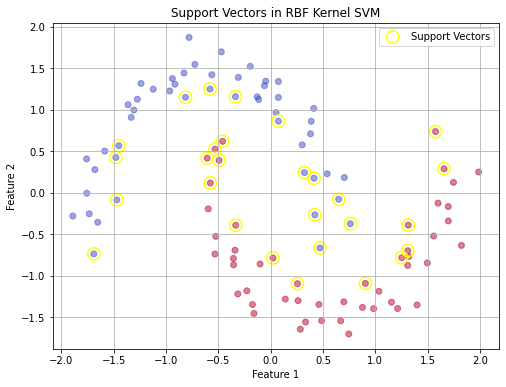

In [10]:
# 训练一个RBF SVM并可视化支持向量
rbf_clf = svm.SVC(kernel='rbf', gamma=0.7, C=1.0)
rbf_clf.fit(X_moon, y_moon)
plot_support_vectors(rbf_clf, X_moon, y_moon, "Support Vectors in RBF Kernel SVM")